# Data pre processing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset=pd.read_csv("Online Sales Data.csv")
dataset
dataset.head(10)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001.0,01-01-2024,NaN,iPhone 14 Pro,2.0,999.99,1999.98,North America,Credit Card
1,10002.0,02-01-2024,Home Appliances,Dyson V11 Vacuum,1.0,499.99,499.99,Europe,PayPal
2,10003.0,03-01-2024,Clothing,Levi's 501 Jeans,3.0,69.99,209.97,Asia,Debit Card
3,10004.0,04-01-2024,Books,The Da Vinci Code,4.0,15.99,63.96,North America,Credit Card
4,10005.0,05-01-2024,Beauty Products,Neutrogena Skincare Set,1.0,89.99,89.99,Europe,PayPal
5,10006.0,06-01-2024,Sports,Wilson Evolution Basketball,5.0,29.99,149.95,Asia,Credit Card
6,10007.0,07-01-2024,Electronics,MacBook Pro 16-inch,1.0,2499.99,2499.99,North America,Credit Card
7,10008.0,08-01-2024,Home Appliances,Blueair Classic 480i,2.0,599.99,1199.98,Europe,PayPal
8,10009.0,09-01-2024,Clothing,Nike Air Force 1,6.0,89.99,539.94,Asia,Debit Card
9,10010.0,10-01-2024,Books,Dune by Frank Herbert,2.0,25.99,51.98,North America,Credit Card


In [2]:
# isnull function to find missing values 
# where ever there is a missing value it will print true
# and sum() gives the particular coloumn of null value 

dataset.isnull().sum()
dataset.isnull().sum()

Transaction ID      1
Date                0
Product Category    4
Product Name        1
Units Sold          2
Unit Price          2
Total Revenue       1
Region              2
Payment Method      1
dtype: int64

# How to find the null values ...?

In [3]:
dataset.shape

(240, 9)

In [4]:
#  to find percentage null value of eveny coloumn

dataset.isnull().sum()/dataset.shape[0]* 100 #(for 1st coloumn)

Transaction ID      0.416667
Date                0.000000
Product Category    1.666667
Product Name        0.416667
Units Sold          0.833333
Unit Price          0.833333
Total Revenue       0.416667
Region              0.833333
Payment Method      0.416667
dtype: float64

In [5]:
# total null values sum
dataset.isnull().sum().sum()

14

In [6]:
# overall null values present in it
dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1])*100

0.6481481481481481

In [7]:
# to find not null values
dataset.notnull().sum()

Transaction ID      239
Date                240
Product Category    236
Product Name        239
Units Sold          238
Unit Price          238
Total Revenue       239
Region              238
Payment Method      239
dtype: int64

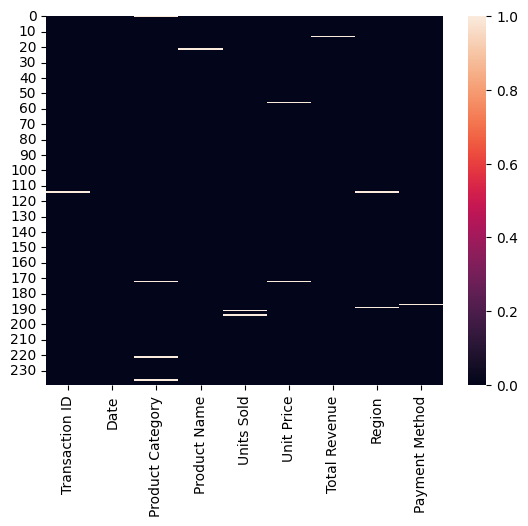

In [8]:
# to see the null values in the graphical format
sns.heatmap(dataset.isnull())
plt.show()
# white values are null values 

# What to do furture with missing values...?

In [9]:
dataset.shape

(240, 9)

In [10]:
dataset.isnull().sum()

Transaction ID      1
Date                0
Product Category    4
Product Name        1
Units Sold          2
Unit Price          2
Total Revenue       1
Region              2
Payment Method      1
dtype: int64

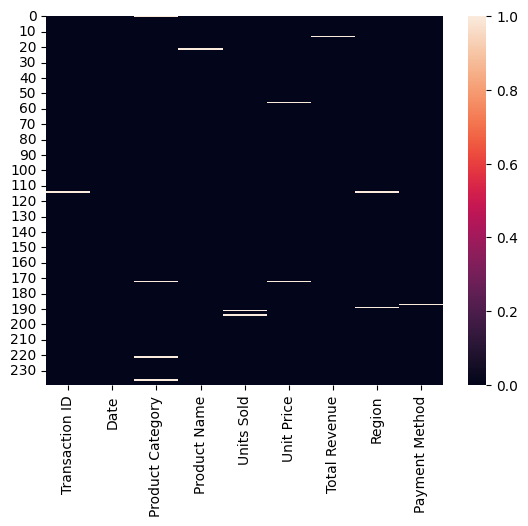

In [11]:
sns.heatmap(dataset.isnull())
plt.show()

# Two methods to delet the data 

### 1st method is that to delet that particular data 
### 2nd to delet the particular row

In [12]:
# depend on dataset
# to remove particular column
dataset.drop(columns=["Region"],inplace=True)
dataset.isnull().sum()

Transaction ID      1
Date                0
Product Category    4
Product Name        1
Units Sold          2
Unit Price          2
Total Revenue       1
Payment Method      1
dtype: int64

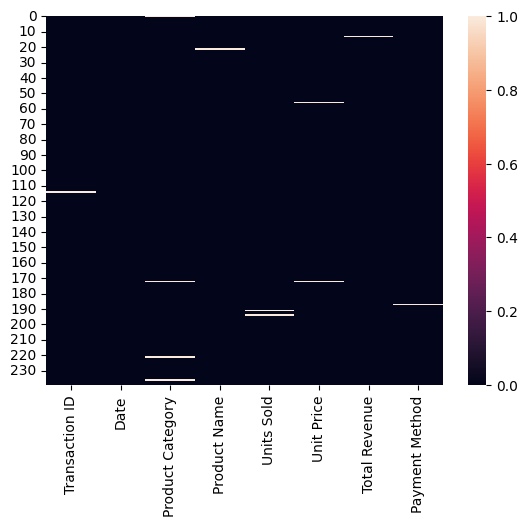

In [13]:
sns.heatmap(dataset.isnull())
plt.show()

In [14]:
# reomove the row which contain the missing content 
dataset.dropna(inplace=True)


In [15]:
dataset.isnull().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Payment Method      0
dtype: int64

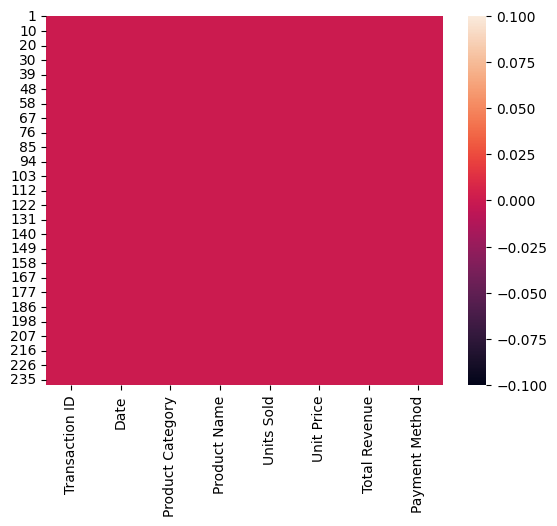

In [16]:
sns.heatmap(dataset.isnull())
plt.show()

In [17]:
dataset.shape

(229, 8)

# How to fill the missing data..........?

In [33]:
dataset_2=pd.read_csv("Crime_2015.csv")
dataset_2.head(70)


,MSA,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorVehicleTheft,State,City
0,"Abilene, TX M.S.A.",412.5,5.3,56.0,NaN,272.8,"3,609.00",NaN,"2,493.60",263.4,TX,Abilene
1,"Akron, OH M.S.A.",238.4,5.1,38.2,75.2,119.8,"2,552.40",575.3,"1,853.00",124.1,OH,Akron
2,"Albany, GA M.S.A.",667.9,7.8,30.4,157.9,471.8,"3,894.10","1,099.60","2,652.80",141.7,GA,Albany
3,"Albany, OR M.S.A.",114.3,2.5,NaN,20.7,63.0,"3,208.40",484.6,"2,476.10",247.7,OR,Albany
4,"Albuquerque, NM M.S.A.",792.6,NaN,63.8,206.7,516.0,"4,607.80",883.4,"3,047.60",676.9,NM,Albuquerque
...,...,...,...,...,...,...,...,...,...,...,...,...
65,"Cincinnati, OH-KY-IN M.S.A.",259.4,4.6,37.2,104.4,113.1,NaN,576.7,"2,077.80",126.5,OH,Cincinnati
66,"Clarksville, TN-KY M.S.A.",404.7,6.0,34.7,48.8,315.2,"2,410.70",488.2,"1,815.00",107.5,TN,Clarksville
67,"Cleveland, TN M.S.A.",483.1,6.6,25.7,40.6,NaN,"3,323.90",615.7,"2,462.00",NaN,TN,Cleveland
68,"Coeur d'Alene, ID M.S.A.",259.6,1.3,45.4,NaN,190.9,"2,176.10",465.8,"1,592.90",117.4,ID,Coeur d'Alene


In [34]:
dataset_2.isnull().sum()

MSA                  1
ViolentCrime         6
Murder               5
Rape                 5
Robbery              4
AggravatedAssault    2
PropertyCrime        7
Burglary             3
Theft                3
MotorVehicleTheft    3
State                3
City                 1
dtype: int64

In [35]:
# to fill the dataset
dataset_2.fillna(10)
# it fill all vales with 10

,MSA,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorVehicleTheft,State,City
0,"Abilene, TX M.S.A.",412.5,5.3,56.0,10,272.8,"3,609.00",10,"2,493.60",263.4,TX,Abilene
1,"Akron, OH M.S.A.",238.4,5.1,38.2,75.2,119.8,"2,552.40",575.3,"1,853.00",124.1,OH,Akron
2,"Albany, GA M.S.A.",667.9,7.8,30.4,157.9,471.8,"3,894.10","1,099.60","2,652.80",141.7,GA,Albany
3,"Albany, OR M.S.A.",114.3,2.5,10.0,20.7,63.0,"3,208.40",484.6,"2,476.10",247.7,OR,Albany
4,"Albuquerque, NM M.S.A.",792.6,10.0,63.8,206.7,516.0,"4,607.80",883.4,"3,047.60",676.9,NM,Albuquerque
...,...,...,...,...,...,...,...,...,...,...,...,...
71,"Columbia, MO M.S.A.",430.2,3.4,53.6,90.2,283.0,"2,684.60",582.6,"1,933.70",168.3,MO,Columbia
72,"Columbia, SC M.S.A.",650.6,6.9,49.7,99.3,494.7,"3,464.00",627.8,"2,466.40",10.0,SC,Columbia
73,"Columbus, GA-AL M.S.A.",468.7,6.9,37.3,195.3,229.2,10,"1,019.80","2,914.00",406.9,GA,Columbus
74,"Columbus, IN M.S.A.",108.6,1.2,33.3,24.7,49.4,"3,286.70",459.1,"2,582.00",245.6,IN,Columbus


In [36]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSA                75 non-null     object 
 1   ViolentCrime       70 non-null     object 
 2   Murder             71 non-null     float64
 3   Rape               71 non-null     float64
 4   Robbery            72 non-null     object 
 5   AggravatedAssault  74 non-null     float64
 6   PropertyCrime      69 non-null     object 
 7   Burglary           73 non-null     object 
 8   Theft              73 non-null     object 
 9   MotorVehicleTheft  73 non-null     float64
 10  State              73 non-null     object 
 11  City               75 non-null     object 
dtypes: float64(4), object(8)
memory usage: 7.2+ KB


In [38]:
dataset_2.fillna(method="bfill",axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_23284\103903454.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset_2.fillna(method="bfill",axis=1)


,MSA,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorVehicleTheft,State,City
0,"Abilene, TX M.S.A.",412.5,5.3,56.0,272.8,272.8,"3,609.00","2,493.60","2,493.60",263.4,TX,Abilene
1,"Akron, OH M.S.A.",238.4,5.1,38.2,75.2,119.8,"2,552.40",575.3,"1,853.00",124.1,OH,Akron
2,"Albany, GA M.S.A.",667.9,7.8,30.4,157.9,471.8,"3,894.10","1,099.60","2,652.80",141.7,GA,Albany
3,"Albany, OR M.S.A.",114.3,2.5,20.7,20.7,63.0,"3,208.40",484.6,"2,476.10",247.7,OR,Albany
4,"Albuquerque, NM M.S.A.",792.6,63.8,63.8,206.7,516.0,"4,607.80",883.4,"3,047.60",676.9,NM,Albuquerque
...,...,...,...,...,...,...,...,...,...,...,...,...
71,"Columbia, MO M.S.A.",430.2,3.4,53.6,90.2,283.0,"2,684.60",582.6,"1,933.70",168.3,MO,Columbia
72,"Columbia, SC M.S.A.",650.6,6.9,49.7,99.3,494.7,"3,464.00",627.8,"2,466.40",SC,SC,Columbia
73,"Columbus, GA-AL M.S.A.",468.7,6.9,37.3,195.3,229.2,"1,019.80","1,019.80","2,914.00",406.9,GA,Columbus
74,"Columbus, IN M.S.A.",108.6,1.2,33.3,24.7,49.4,"3,286.70",459.1,"2,582.00",245.6,IN,Columbus


# Mode filling in categorial data

In [57]:
# for particular column take mode
dataset_2["MSA"].mode()[0]

'Abilene, TX M.S.A.'

In [58]:
dataset_2["MSA"].fillna(dataset_2["MSA"].mode()[0],inplace=True)
dataset_2

,MSA,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorVehicleTheft,State,City
0,"Abilene, TX M.S.A.",412.5,5.3,56.0,104.4,272.8,"3,609.00",465.8,"2,493.60",263.4,TX,Abilene
1,"Akron, OH M.S.A.",238.4,5.1,38.2,75.2,119.8,"2,552.40",575.3,"1,853.00",124.1,OH,Akron
2,"Albany, GA M.S.A.",667.9,7.8,30.4,157.9,471.8,"3,894.10","1,099.60","2,652.80",141.7,GA,Albany
3,"Albany, OR M.S.A.",114.3,2.5,NaN,20.7,63.0,"3,208.40",484.6,"2,476.10",247.7,OR,Albany
4,"Albuquerque, NM M.S.A.",792.6,NaN,63.8,206.7,516.0,"4,607.80",883.4,"3,047.60",676.9,NM,Albuquerque
...,...,...,...,...,...,...,...,...,...,...,...,...
71,"Columbia, MO M.S.A.",430.2,3.4,53.6,90.2,283.0,"2,684.60",582.6,"1,933.70",168.3,MO,Columbia
72,"Columbia, SC M.S.A.",650.6,6.9,49.7,99.3,494.7,"3,464.00",627.8,"2,466.40",NaN,SC,Columbia
73,"Columbus, GA-AL M.S.A.",468.7,6.9,37.3,195.3,229.2,"1,325.80","1,019.80","2,914.00",406.9,GA,Columbus
74,"Columbus, IN M.S.A.",108.6,1.2,33.3,24.7,49.4,"3,286.70",459.1,"2,582.00",245.6,IN,Columbus


In [59]:
for i in dataset_2.select_dtypes(include="object").columns:
   dataset_2[i].fillna(dataset_2[i].mode()[0],inplace=True)
dataset_2.isnull().sum()

MSA                  0
ViolentCrime         0
Murder               5
Rape                 5
Robbery              0
AggravatedAssault    2
PropertyCrime        0
Burglary             0
Theft                0
MotorVehicleTheft    3
State                0
City                 0
dtype: int64